# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**a series is reporter data, b series is partner data**

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [9]:
# Reporter
reporter = '699' # India
# Partner
partner = 'ALL' # All
# Period
period = '2019' # Annual
# Classification Code
cc = '710813'

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [10]:
status = tta.data_available(reporter, 201912, 'HS', 'M')
print(status)
status = tta.data_available(partner, 201912, 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '440', 'rDesc': 'Lithuania', 'ps': '201912', 'TotalRecords': 121110, 'isOriginal': 1, 'publicationDate': '2020-02-20T00:00:00', 'isPartnerDetail': 1}, {'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '757', 'rDesc': 'Switzerland', 'ps': '201912', 'TotalRecords': 230203, 'isOriginal': 1, 'publicationDate': '2020-02-05T00:00:00', 'isPartnerDetail': 1}, {'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '616', 'rDesc': 'Poland', 'ps': '201912', 'TotalRecords': 256285, 'isOriginal': 1, 'publicationDate': '2020-02-22T00:00:00', 'isPartnerDetail': 1}, {'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '191', 'rDesc': 'Croatia', 'ps': '201912', 'TotalRecords': 109405, 'isOriginal': 1, 'publicationDat

# Data

In [11]:
data_in, data_out = tta.get_import_data(reporter, partner, period, cc)
data = tta.compare(data_in, data_out, 'pt3ISO', 'rt3ISO')
df = tta.prepare(data)

{'r': '699', 'p': 'ALL', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': '710813', 'freq': 'A', 'max': '100000'}
{'r': 'ALL', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': '710813', 'freq': 'A', 'max': '100000'}


In [15]:
df['iso'] = df.index
df.sort_values(by=['value_diff_abs'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,iso
DEU,710813,"Metals; gold, semi-manufactured",1,Weight in kilograms,0.03,1,Weight in kilograms,0.03,0.00,0,0.0,0.0,0.00,0.0,DEU
IDN,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,0,NaN,NaN,0.00,NaN,IDN
ZAF,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,0,NaN,NaN,0.00,NaN,ZAF
USA,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,0,NaN,NaN,0.00,NaN,USA
ISL,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,1,Weight in kilograms,0.00,0.00,-1,-inf,NaN,0.00,NaN,ISL
AUT,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,0,NaN,NaN,0.00,NaN,AUT
CHE,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,0,NaN,NaN,0.00,NaN,CHE
DNK,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,1,Weight in kilograms,0.00,0.00,-1,-inf,NaN,0.00,NaN,DNK
KOR,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,0,Weight in kilograms,0.01,-0.01,0,NaN,-inf,0.01,inf,KOR
CAN,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,0,Weight in kilograms,0.02,-0.02,0,NaN,-inf,0.02,inf,CAN


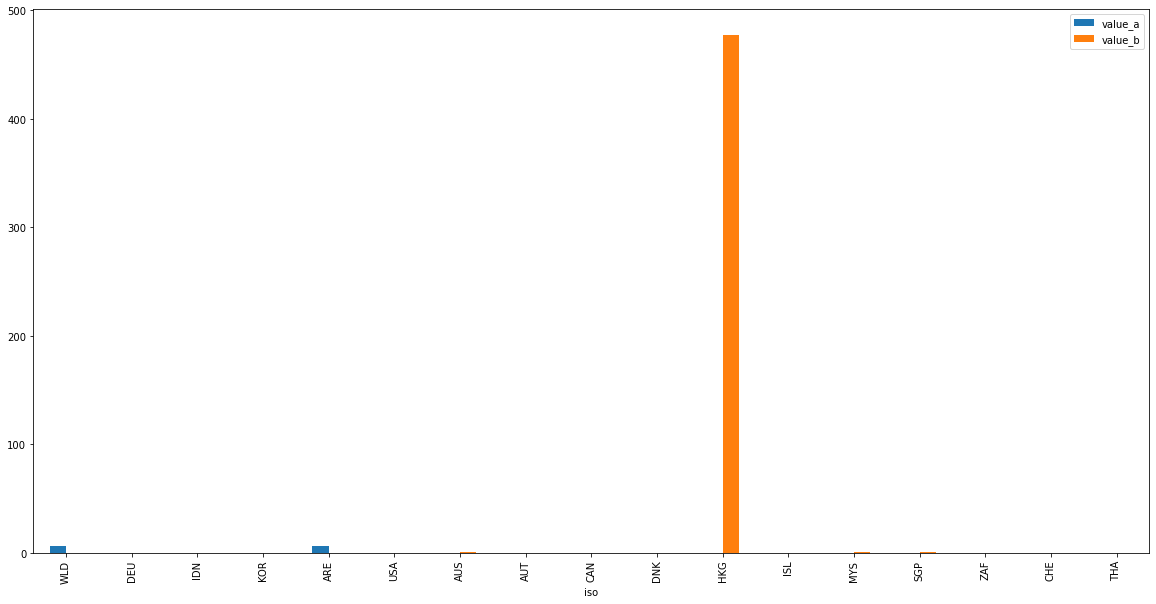

In [16]:
df.plot(kind='bar', y=['value_a','value_b'], x='iso')
plt.show()

## Aggregate

In [17]:
print("Total export, as per reporter data:", df['value_a'].sum(), " million USD.")
print("Total import, as per partner data:", df['value_b'].sum(), " million USD.")


Total export, as per reporter data: 12.59  million USD.
Total import, as per partner data: 478.24  million USD.


## Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%

In [18]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 10 # value to filter
dfi = df[(df['value_pct_abs'] > percentage_cutoff) & (df['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['value_diff_abs'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,iso
HKG,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.0,11664,Weight in kilograms,477.18,-477.18,-11664,-inf,-inf,477.18,inf,HKG


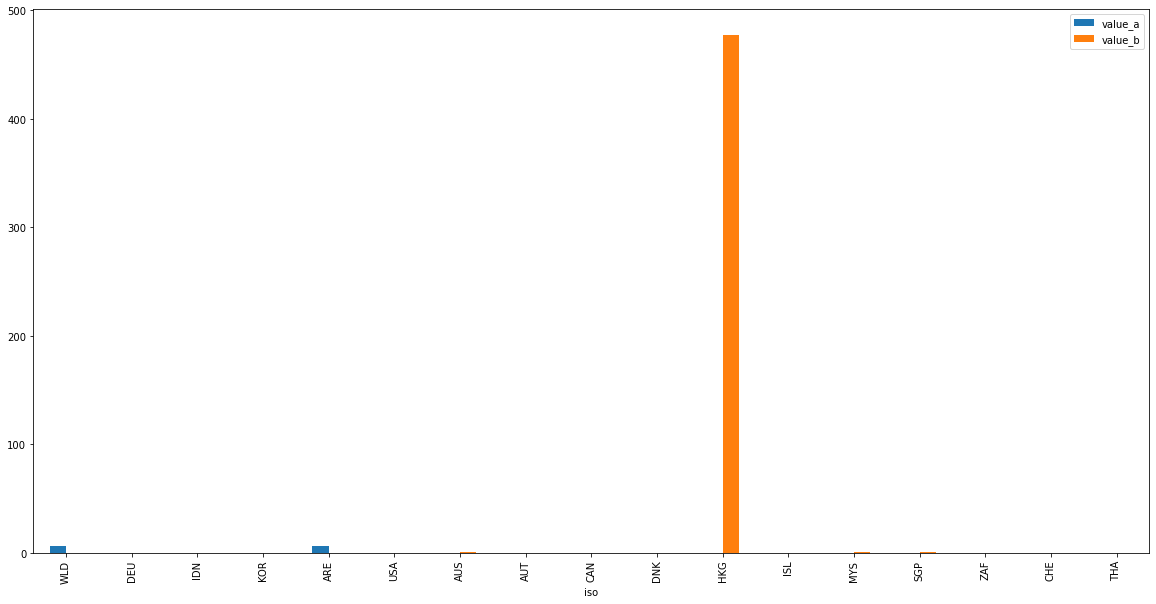

In [19]:
df.plot(kind='bar', y=['value_a','value_b'], x='iso')
plt.show()